---
# 11.3 Cubic spline interpolation
---

## Introduction

Suppose now that we do not have access to $f'$.

What additional conditions should we use to determine the piecewise cubic polynomial?

Each cubic piece is determined by four coefficients:

$$p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3, \quad x \in [x_i,x_{i+1}], \quad i=0,\ldots,n-1.$$

There are $n$ subintervals, so we have a total of $4n$ coefficients to determine.

Thus, we will need a total of $4n$ equations to determine all coefficients.

---

## Continuity and differentiability conditions

Enforcing **continuity** (i.e., $p \in C^0[a,b]$) gives us $2n$ equations:

$$
\begin{align}
p_i(x_i) &= f(x_i), \quad i = 0, \dots, n-1 \quad \text{(left)}\\
p_i(x_{i+1}) &= f(x_{i+1}), \quad i = 0, \dots, n-1 \quad \text{(right)}\\
\end{align}
$$

Enforcing **first derivative continuity** (i.e., $p \in C^1[a,b]$) gives us $n-1$ equations:

$$
p_i'(x_{i+1}) = p_{i+1}'(x_{i+1}), \quad i = 0, \dots, n-2
$$

Enforcing **second derivative continuity** (i.e., $p \in C^2[a,b]$) gives us another $n-1$ equations:

$$
p_i''(x_{i+1}) = p_{i+1}''(x_{i+1}), \quad i = 0, \dots, n-2
$$

Thus, we have a total of $4n - 2$ equations. This is not enough to determine the $4n$ coefficients, so we need to choose two more conditions.

---

## Two additional conditions

1. **Free boundary**:

    $$p''(x_0) = p''(x_n) = 0$$

    Gives us the **natural spline**. Often it is not a good choice since it is usually unreasonable to assume that $f''(x_0) = f''(x_n) = 0$.

2. **Clamped boundary**:

    $$p'(x_0) = f'(x_0), \quad p'(x_n) = f'(x_n)$$

    Gives us the **complete spline**. However, this option is not possible if the values of $f'(x_0)$ and $f'(x_n)$ are unknown.

3. **Not-a-knot**:

    $$p_0'''(x_1) = p_1'''(x_1), \quad p_{n-2}'''(x_{n-1}) = p_{n-1}'''(x_{n-1})$$

    This means that $x_1$ and $x_{n-1}$ are no longer knots (i.e., break points) since $p_0$ and $p_1$ become a single cubic polynomial, as do $p_{n-2}$ and $p_{n-1}$.

---

## Computing the Cubic Spline

We start with

$$
\begin{align}
p_i(x) &= a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3\\
p_i'(x) &= b_i + 2c_i(x-x_i) + 3d_i(x-x_i)^2\\
p_i''(x) &= 2c_i + 6d_i(x-x_i)\\
\end{align}
$$

### Solving for $a_i$

The **left continuity equations** $p_i(x_i) = f(x_i)$ imply that

$$\fbox{$a_i = f(x_i), \quad i=0,\ldots,n-1.$}$$

### Solving for $d_i$

The **second derivative continuity equations** $p_i''(x_{i+1}) = p_{i+1}''(x_{i+1})$ become

$$2c_i + 6d_i(x_{i+1}-x_i) = 2c_{i+1} + 6d_{i+1}(x_{i+1}-x_{i+1}), \quad i=0,\ldots,n-2.$$

 We let 

$$h_i = x_{i+1} - x_i, \quad i=0,\ldots,n-1.$$ 

Therefore,

$$c_i + 3d_i h_i = c_{i+1}, \quad i=0,\ldots,n-2.$$

We define 

$$c_n = c_{n-1} + 3d_{n-1} h_{n-1}.$$ 

Then

$$\fbox{$d_i = \displaystyle{\frac{c_{i+1} - c_i}{3 h_i}}, \quad i=0,\ldots,n-1.$}$$



### Solving for $b_i$

The **right interpolation equations** $p_i(x_{i+1}) = f(x_{i+1})$ imply that

$$a_i + b_i (x_{i+1}-x_i) + c_i (x_{i+1}-x_i)^2 + d_i (x_{i+1}-x_i)^3 = f(x_{i+1}), \quad i=0,\ldots,n-1.$$

Since $a_i = f(x_i)$, we have

$$f(x_i) + b_i h_i + c_i h_i^2 + d_i h_i^3 = f(x_{i+1}), \quad i=0,\ldots,n-1.$$

Simplifying and substituting formula for $d_i$, we obtain

$$b_i + c_i h_i +  \frac{c_{i+1} - c_i}{3 h_i} h_i^2 = \frac{f(x_{i+1}) - f(x_i)}{h_i}, \quad i=0,\ldots,n-1.$$

This further simplifies to

$$b_i + \frac{h_i}{3}(c_{i+1} + 2c_i) = f[x_i,x_{i+1}], \quad i=0,\ldots,n-1.$$

Therefore,

$$\fbox{$b_i = f[x_i,x_{i+1}] - \displaystyle{\frac{h_i}{3}}(c_{i+1} + 2c_i), \quad i=0,\ldots,n-1.$}$$

### Solving for $c_i$

The **first derivative continuity equations** $p_i'(x_{i+1}) = p_{i+1}'(x_{i+1})$ become

$$b_i + 2c_i(x_{i+1}-x_i) + 3d_i(x_{i+1}-x_i)^2 = b_{i+1} + 2c_{i+1}(x_{i+1}-x_{i+1}) + 3d_{i+1}(x_{i+1}-x_{i+1})^2, \quad i = 0,\ldots,n-2.$$

Again substituting the formula for $d_i$, we get

$$b_i + 2c_i h_i + 3\frac{c_{i+1}-c_i}{3h_i} h_i^2 = b_{i+1}, \quad i=0,\ldots,n-2.$$

Simplifying,

$$b_i + (c_{i+1}+c_i) h_i = b_{i+1}, \quad i=0,\ldots,n-2.$$

Shifting the index, we have

$$b_{i-1} + (c_{i}+c_{i-1}) h_{i-1} = b_{i}, \quad i=1,\ldots,n-1.$$

Substituting the formula for $b_i$ and $b_{i-1}$, we obtain

$$f[x_{i-1},x_{i}] - \displaystyle{\frac{h_{i-1}}{3}}(c_{i} + 2c_{i-1}) + (c_{i}+c_{i-1}) h_{i-1} = f[x_i,x_{i+1}] - \displaystyle{\frac{h_i}{3}}(c_{i+1} + 2c_i), \quad i=1,\ldots,n-1.$$

Moving the $c$ terms to the LHS and everything else to the RHS, we obtain

$$ h_i(c_{i+1} + 2c_i) - h_{i-1}(c_{i} + 2c_{i-1}) + 3 h_{i-1}(c_{i}+c_{i-1}) = 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right), \quad i=1,\ldots,n-1.$$

 Combining common terms, we have

$$\fbox{$h_{i-1}c_{i-1} + 2(h_{i-1} + h_i )c_i + h_i c_{i+1} = 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right), \quad i=1,\ldots,n-1.$}$$

---

### Summary

$$a_i = f(x_i), \quad i=0,\ldots,n-1$$

$$b_i = f[x_i,x_{i+1}] - \displaystyle{\frac{h_i}{3}}(c_{i+1} + 2c_i), \quad i=0,\ldots,n-1$$

$$h_{i-1}c_{i-1} + 2(h_{i-1} + h_i )c_i + h_i c_{i+1} = 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right), \quad i=1,\ldots,n-1$$

$$d_i = \displaystyle{\frac{c_{i+1} - c_i}{3 h_i}}, \quad i=0,\ldots,n-1$$

---

## Free boundary: $p_0''(x_0) = p_{n-1}''(x_n) = 0$

The condition $p_0''(x_0) = 0$ gives us 

$$2 c_0 + 6 d_0 (x_0 - x_0) = 0 \quad \implies \quad c_0 = 0.$$

The condition $p_{n-1}''(x_n) = 0$ gives us

$$2 c_{n-1} + 6 d_{n-1} (x_n - x_{n-1}) = 0 \quad \implies \quad c_n = c_{n-1} + 3d_{n-1} h_{n-1} = 0.$$

The linear system 

$$\fbox{$h_{i-1}c_{i-1} + 2(h_{i-1} + h_i )c_i + h_i c_{i+1} = 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right), \quad i=1,\ldots,n-1$}$$

can thus be written as

$$
\begin{bmatrix}
2(h_0 + h_1) & h_1 \\
h_1 & 2(h_1 + h_2) & h_2 \\
&\ddots & \ddots & \ddots \\
&& h_{n-3} & 2(h_{n-3} + h_{n-2}) & h_{n-2} \\
&&& h_{n-2} & 2(h_{n-2} + h_{n-1}) \\
\end{bmatrix}
\begin{bmatrix}
c_1\\c_2\\\vdots\\c_{n-2}\\c_{n-1}\\
\end{bmatrix} = 
\begin{bmatrix}
\psi_1\\\psi_2\\\vdots\\\psi_{n-2}\\\psi_{n-1}\\
\end{bmatrix},
$$

where $\psi_i = 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right)$, for $i = 1,\ldots,n-1$. 

- The above matrix is **symmetric tridiagonal**.

- Since the matrix is **strictly diagonally dominant**, the [Gershgorin circle theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem) implies that all its eigenvalues are positive, so it is a **positive definite** matrix. 

- Thus, the matrix is **nonsingular** and the system can be solved in $\mathcal{O}(n)$ flops.

---

## Example

Let's compute the **natural spline** using the **free boundary** conditions for the function $f(x) = \cos(x)$ over the interval $[0, 2\pi]$ using four subintervals (i.e., five knots).

In [1]:
using LinearAlgebra

dg = [1., 2., 3.]
du = [4., 5.]
A = SymTridiagonal(dg, du)

3×3 SymTridiagonal{Float64, Vector{Float64}}:
 1.0  4.0   ⋅ 
 4.0  2.0  5.0
  ⋅   5.0  3.0

In [2]:
dump(A)

SymTridiagonal{Float64, Vector{Float64}}
  dv: Array{Float64}((3,)) [1.0, 2.0, 3.0]
  ev: Array{Float64}((2,)) [4.0, 5.0]


In [4]:
range(1, 4, 5) |> collect

5-element Vector{Float64}:
 1.0
 1.75
 2.5
 3.25
 4.0

In [5]:
collect(range(1, 4, 5))

5-element Vector{Float64}:
 1.0
 1.75
 2.5
 3.25
 4.0

In [6]:
function naturalspline(f, α, β, n, fp0, fpn)
    # Compute the data point (xi, yi)
    x = range(α, β, length=n+1) |> collect
    y = f.(x)

    # Compute the vector h
    #h = x[2:end] - x[1:end-1]
    h = [x[i+1] - x[i] for i = 1:n]

    # Compute the diagonal and superdiagonal of A
    dg = 2(h[1:end-1] + h[2:end])
    du = h[2:end-1]

    # Form the symmetric tridiagonl matrix A
    A = SymTridiagonal(dg, du)

    # Compute the vector of divided differences
    divdif = (y[2:end] - y[1:end-1])./h

    # Compute the RHS vector ψ
    ψ = 3(divdif[2:end] - divdif[1:end-1])

    # Solve for the coefficients c
    # Include the conditions that c0 = cn = 0
    c = [0; A\ψ; 0]

    # Compute the coefficients a
    a = y[1:end-1]

    # Compute the coefficients b
    b = divdif - h.*(c[2:end] + 2c[1:end-1])/3

    # Compute the coefficients d
    d = (c[2:end] - c[1:end-1])./(3h)

    return a, b, c, d, x, y
end

naturalspline (generic function with 1 method)

In [7]:
using Plots

function plotspline(method, f, α, β, n, fp0=0., fpn=0.)
    
    # Compute the spline
    a, b, c, d, x, y = method(f, α, β, n, fp0, fpn)

    # N is the number of evaluation points in each subinterval
    N = 100

    # Compute the evaluation points
    xx = range(α, β, length=n*N)

    # Evaluate the cubic spline
    p = zeros(length(xx))
    ind = 1
    for i=1:n
        xdiff = xx[ind:ind+N-1] .- x[i]
        p[ind:ind+N-1] .= ((d[i]*xdiff .+ c[i]).*xdiff .+ b[i]).*xdiff .+ a[i]
        ind += N
    end

    # Plot everything
    plt = plot(legend=:none, layout=(2,1), size=(600,400))
    title!("Cubic spline interpolation", subplot=1)
    title!("Interpolation error", subplot=2)

    # Plot y = f(x)
    plot!(xx, f.(xx), subplot=1, aspect_ratio=:equal)
    plot!(xx, p)
    scatter!(x, y, c=2)
    
    # Plot the error
    plot!(xx, abs.(p .- f.(xx)), subplot=2, label=:none)

    println("maximum error = ", maximum(abs.(p .- f.(xx))))

    return plt
end

plotspline (generic function with 3 methods)

maximum error = 0.161018593540746


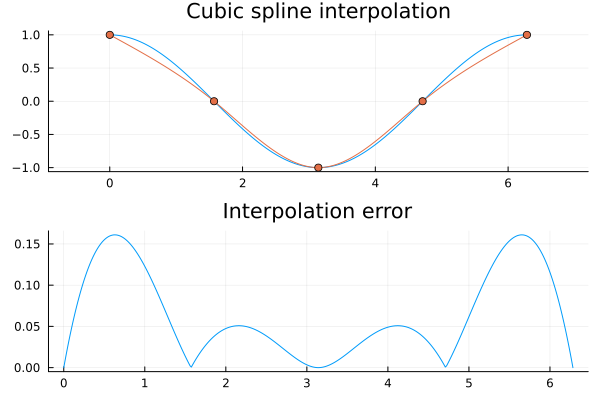

In [11]:
plotspline(naturalspline, cos, 0., 2π, 4)

maximum error = 0.020016629344025927


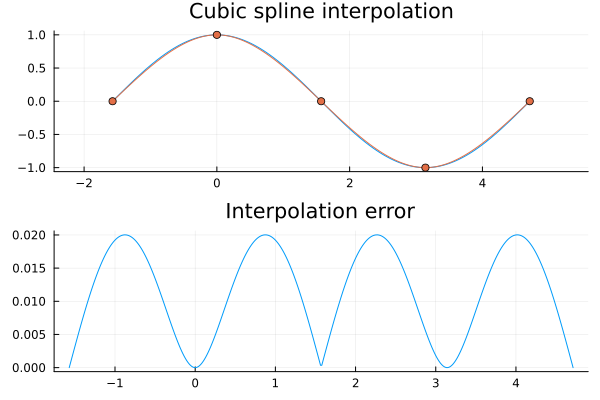

In [13]:
plotspline(naturalspline, cos, -π/2, 3π/2, 4)

---

## Clamped boundary: $p'(x_0) = f'(x_0), \ p'(x_n) = f'(x_n)$


 The condition $p_0'(x_0) = f'(x_0)$ gives us 

$$b_0 + 2c_0(x_0-x_0) + 3d_0(x_0-x_0)^2 = f'(x_0) \quad \implies \quad b_0 = f'(x_0)$$


 The condition $p_{n-1}'(x_n) = f'(x_n)$ gives us

$$b_{n-1} + 2c_{n-1}(x_n-x_{n-1}) + 3d_{n-1}(x_n-x_{n-1})^2 = f'(x_n),$$

 which implies that

$$b_{n-1} + 2c_{n-1}h_{n-1} + 3d_{n-1}h_{n-1}^2 = f'(x_n).$$


### Recall:

$$b_i = f[x_i,x_{i+1}] - \displaystyle{\frac{h_i}{3}}(c_{i+1} + 2c_i), \quad i=0,\ldots,n-1$$

$$d_i = \displaystyle{\frac{c_{i+1} - c_i}{3 h_i}}, \quad i=0,\ldots,n-1$$

 Therefore, $b_0 = f'(x_0)$ becomes

$$f[x_0,x_1] - \frac{h_0}{3}(c_1 + 2c_0) = f'(x_0)$$

 which gives us

$$\fbox{$2h_0 c_0 + h_0 c_1 = 3\left(f[x_0,x_1] - f'(x_0)\right)$.}$$

 In addition, $b_{n-1} + 2c_{n-1}h_{n-1} + 3d_{n-1}h_{n-1}^2 = f'(x_n)$ becomes

 $$f[x_{n-1},x_n] - \frac{h_{n-1}}{3}(c_n + 2c_{n-1}) + 2c_{n-1}h_{n-1} + 3\frac{c_n - c_{n-1}}{3h_{n-1}}h_{n-1}^2 = f'(x_n).$$

 Simplifying, we get

 $$ - h_{n-1}(c_n + 2c_{n-1}) + 6c_{n-1}h_{n-1} + 3(c_n - c_{n-1})h_{n-1} = 3\left(f'(x_n) - f[x_{n-1},x_n]\right),$$

 which becomes

 $$\fbox{$h_{n-1} c_{n-1} + 2 h_{n-1} c_n = 3\left(f'(x_n) - f[x_{n-1},x_n]\right).$}$$

The linear system 

$$\fbox{$2h_0 c_0 + h_0 c_1 = 3\left(f[x_0,x_1] - f'(x_0)\right)$}$$

$$\fbox{$h_{i-1}c_{i-1} + 2(h_{i-1} + h_i )c_i + h_i c_{i+1} = 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right), \quad i=1,\ldots,n-1$}$$

 $$\fbox{$h_{n-1} c_{n-1} + 2 h_{n-1} c_n = 3\left(f'(x_n) - f[x_{n-1},x_n]\right)$}$$

can thus be written as

$$
\begin{bmatrix}
2h_0 & h_0\\
h_0& 2(h_0 + h_1) & h_1 \\
& &\ddots & \ddots & \ddots \\
&&&& h_{n-2} & 2(h_{n-2} + h_{n-1}) & h_{n-1} \\
&&&&& h_{n-1} & 2h_{n-1} \\
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\\vdots\\c_{n-1}\\c_n\\
\end{bmatrix}
=
\begin{bmatrix}
\psi_0\\\psi_1\\\vdots\\\psi_{n-1}\\\psi_n\\
\end{bmatrix},
$$

where

$$
\begin{align}
\psi_0 &= 3\left(f[x_0,x_1] - f'(x_0)\right),\\
\psi_i &= 3\left(f[x_i,x_{i+1}] - f[x_{i-1},x_{i}]\right), \quad i = 1,\ldots,n-1, \\
\psi_n &= 3\left(f'(x_n) - f[x_{n-1},x_n]\right).\\
\end{align}
$$

- Again, the above matrix is **symmetric tridiagonal** and **strictly diagonally dominant**.

- Thus, the matrix is **positive definite**, hence **nonsingular**, and the linear system can be solved in $\mathcal{O}(n)$ flops.

---

## Example

Let's compute the **complete spline** using the **clamped boundary** conditions for the function $f(x) = \cos(x)$ over the interval $[0, 2\pi]$ using four subintervals (i.e., five knots).

In [15]:
function completespline(f, α, β, n, fp0, fpn)
    # Compute the interpolation points and 
    # corresponding function values
    x = range(α, β, length=n+1) |> collect
    y = f.(x)

    # Compute the vector h
    h = x[2:end] - x[1:end-1]

    # Compute the diagonal and superdiagonal of A
    dg = [2h[1]; 2(h[1:end-1] + h[2:end]); 2h[end]]
    du = h

    # Form the symmetric tridiagonl matrix A
    A = SymTridiagonal(dg, du)

    # Compute the vector of divided differences
    divdif = (y[2:end] - y[1:end-1])./h

    # Compute the RHS vector ψ
    ψ = [3(divdif[1] - fp0); 3(divdif[2:end] - divdif[1:end-1]); 3(fpn - divdif[end])]

    # Solve for the coefficients c
    c = A\ψ

    # Compute the coefficients a
    a = y[1:end-1]

    # Compute the coefficients b
    b = divdif - h.*(c[2:end] + 2c[1:end-1])/3

    # Compute the coefficients d
    d = (c[2:end] - c[1:end-1])./(3h)

    return a, b, c, d, x, y
end

completespline (generic function with 1 method)

maximum error = 0.0200169398715756


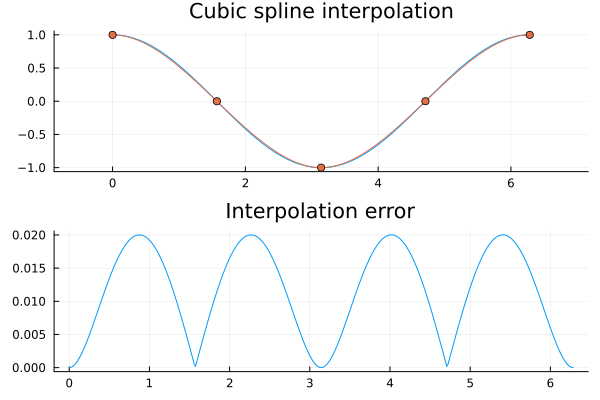

In [16]:
# Providing additional information about f' at x0 and xn
fp0, fpn = 0., 0.  

plotspline(completespline, cos, 0., 2π, 4, fp0, fpn)

---

## Error bounds

1. **Clamped ends**:

    $$\max_{x \in [a,b]} \left|f(x) - p(x) \right| \leq \frac{5}{384} \left\|f''''\right\| h^4$$

2. **Not-a-Knot**:

    $$\max_{x \in [a,b]} \left|f(x) - p(x) \right| \approx \frac{5}{384} \left\|f''''\right\| h^4$$

    Reference: [CS412 Introduction to Numerical Analysis, Lecture 11: Interpolation by Cubic Splines](http://pages.cs.wisc.edu/~amos/412/lecture-notes/lecture11.pdf) by Professor Amos Ron at University of Wisconsin-Madison.

 Impressively, we obtain $\mathcal{O}(h^4)$ methods, the same order as the piecewise cubic Hermite interpolation, but only using half the information about the function $f$.


---